In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/datasets/credit_default.xls",header=1,index_col=0)

In [8]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
data.rename(columns={'default payment next month':'default','PAY_0':'PAY_1'},inplace=True)

In [10]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [11]:
len(data)

30000

In [12]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [14]:
data['default'].value_counts(1)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [15]:
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [16]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [0]:
columns=list(data.columns)
num=[]
cat=[]
#Classifing numerical and categorical data into num[] and cat[] lists
for i in columns:
    if((np.array(data[i].unique()).shape[0]>30 and data[i].dtype in['int64'])):
      num.append(i)  #appending to num list
    else:
      cat.append(i)  #appending to cat list

In [18]:
num,cat

(['LIMIT_BAL',
  'AGE',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'],
 ['SEX',
  'EDUCATION',
  'MARRIAGE',
  'PAY_1',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'default'])

In [19]:
q1 = np.percentile(data['LIMIT_BAL'],25)
q3 = np.percentile(data['LIMIT_BAL'],75)
iqr = q3-q1
iqr

190000.0

In [20]:
q1

50000.0

In [21]:
lb = q1-1.5*iqr
ub = q3+1.5*iqr
lb,ub

(-235000.0, 525000.0)

In [22]:
data[(data['LIMIT_BAL']<lb)|(data['LIMIT_BAL']>ub)].shape[0]

167

# Univariate analysis

## Numerical variables


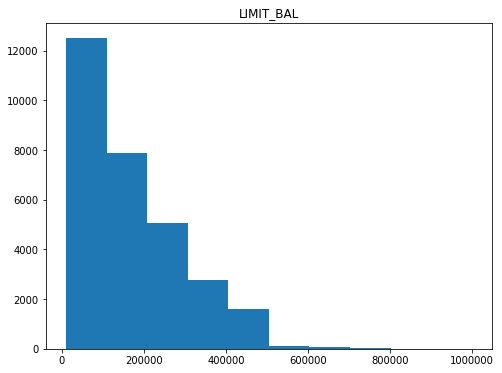

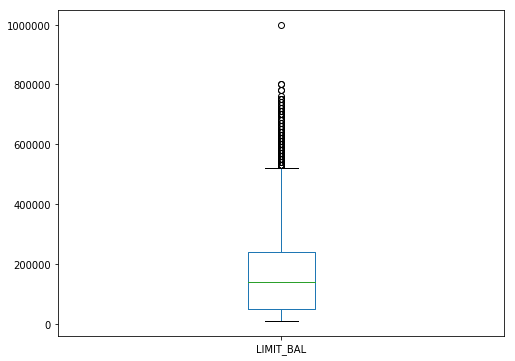

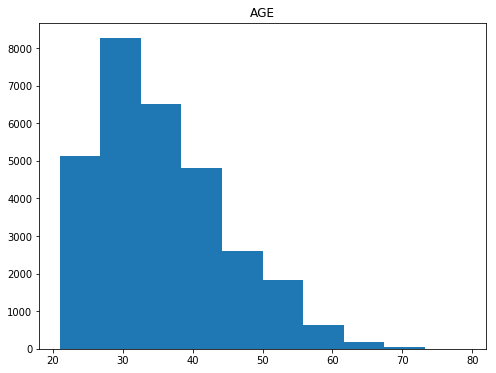

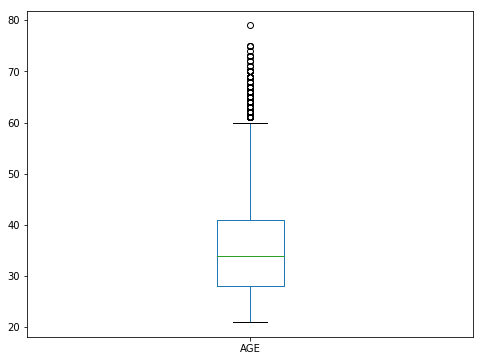

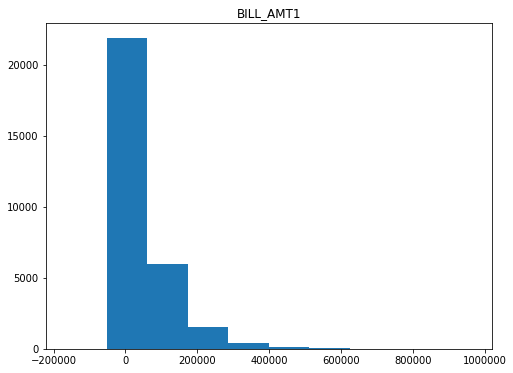

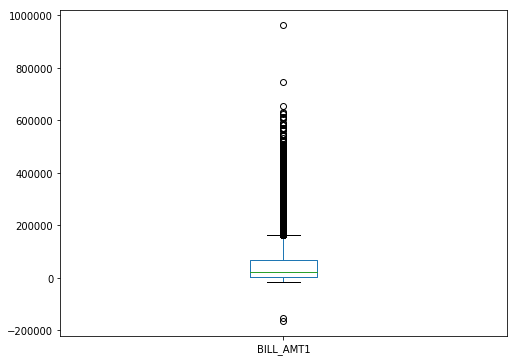

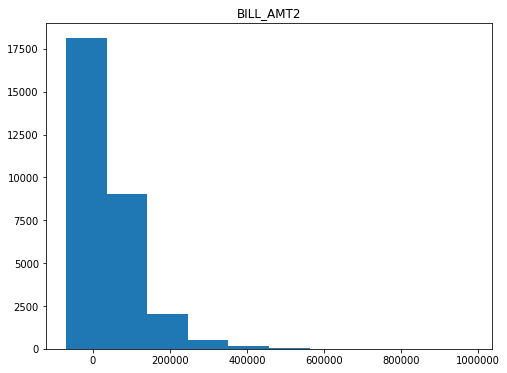

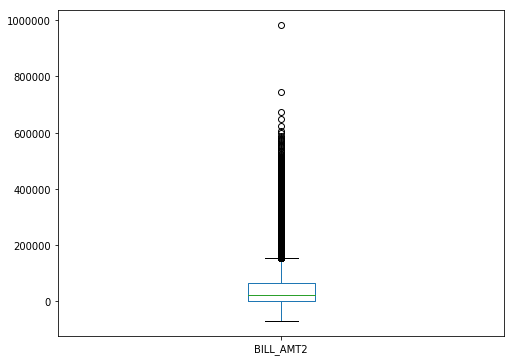

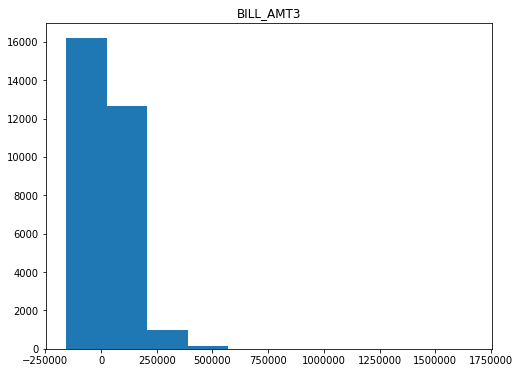

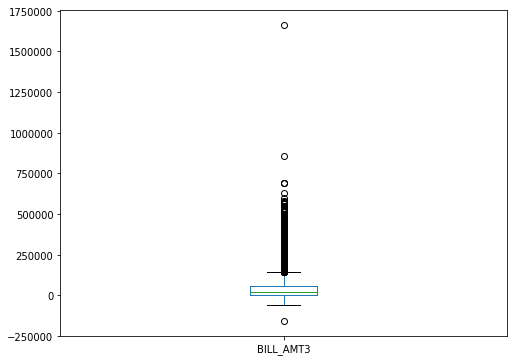

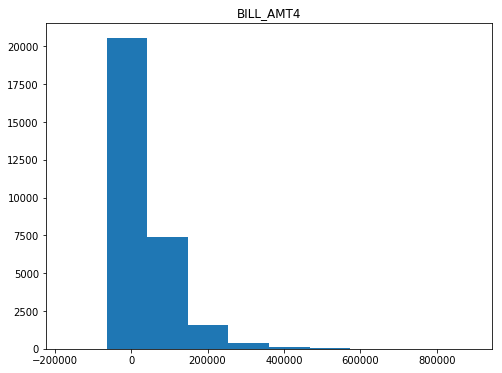

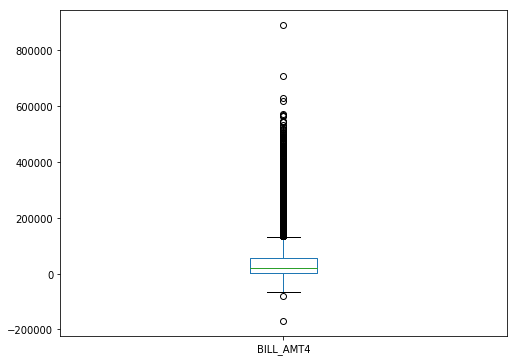

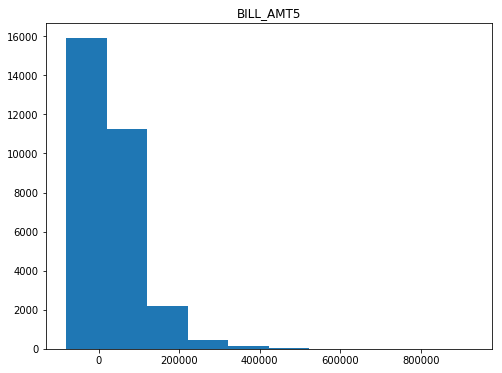

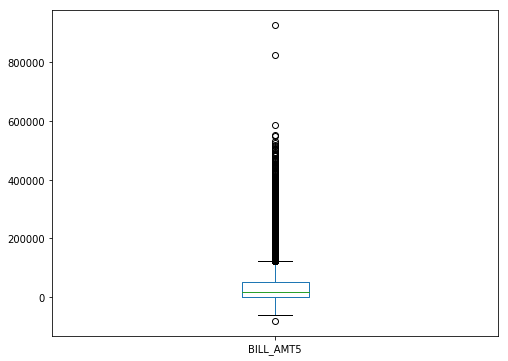

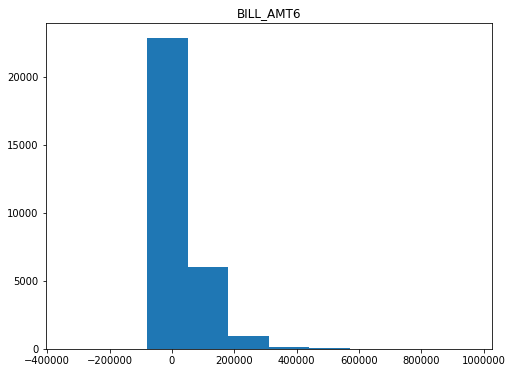

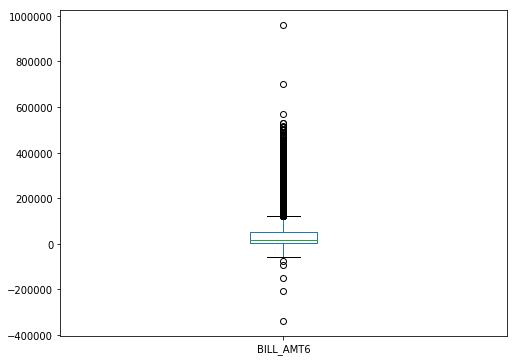

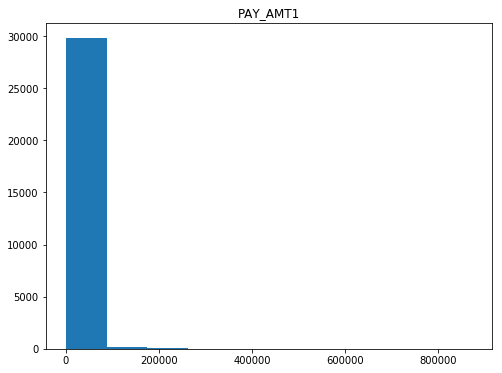

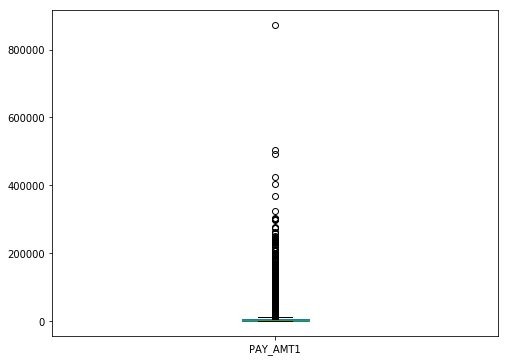

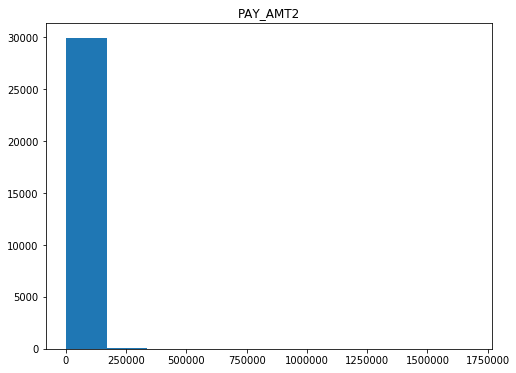

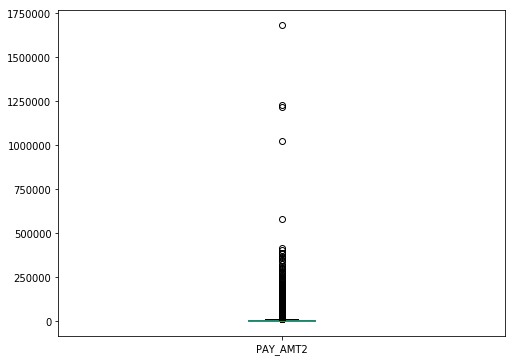

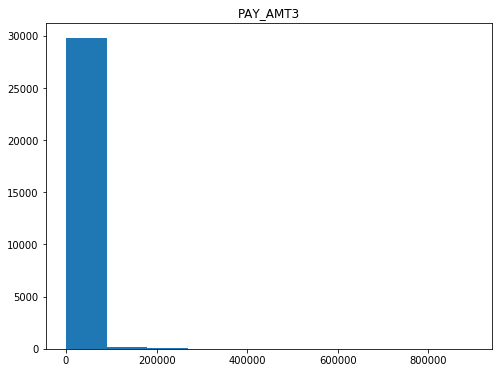

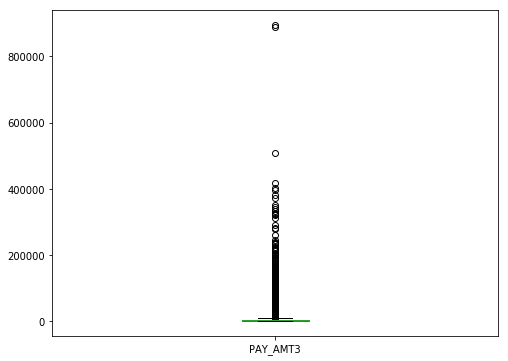

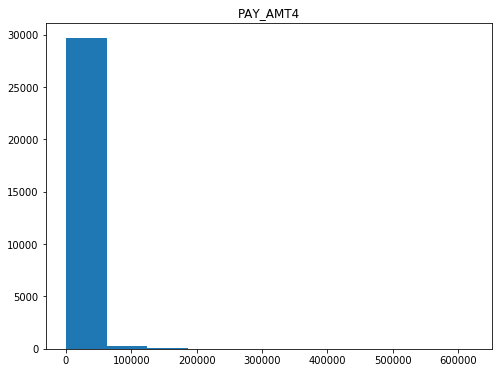

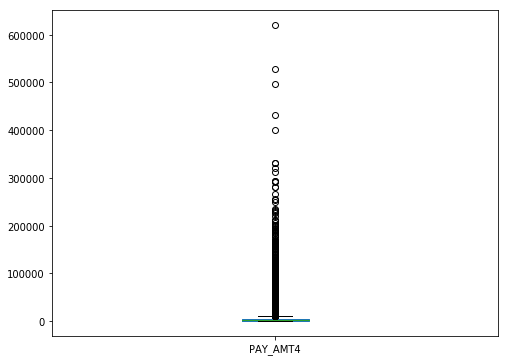

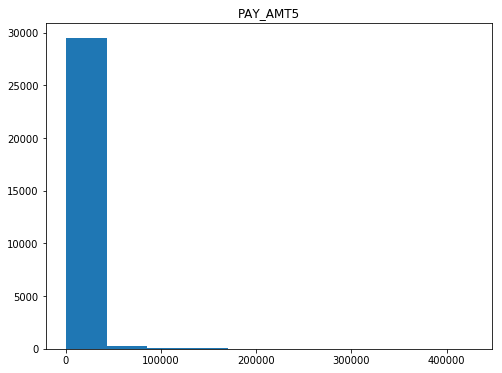

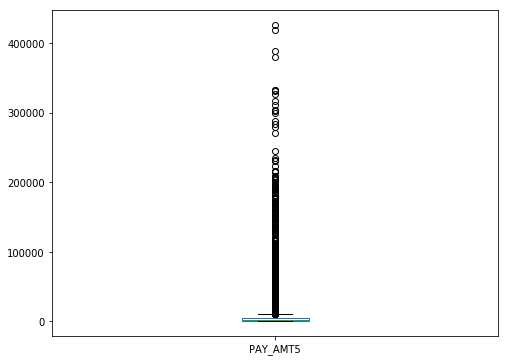

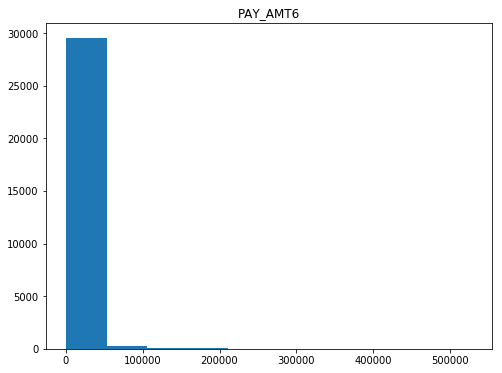

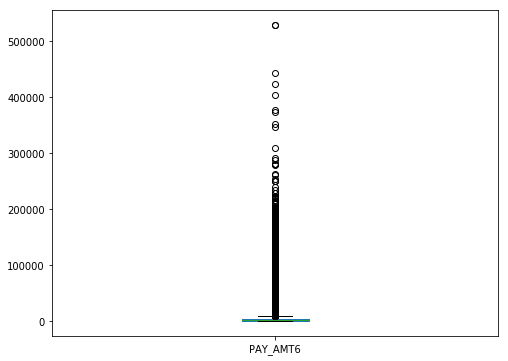

In [23]:
for j in num:
  data.hist(column=j,grid=False,figsize=(8,6))
  #plt.savefig('%s_hist.png'%j)
  plt.show() 
  data.boxplot(column=j,grid=False,figsize=(8,6))
  plt.show()

In [24]:
for j in num:
  q1 = np.percentile(data[j],25)
  q3 = np.percentile(data[j],75)
  iqr = q3-q1
  lb = q1-1.5*iqr
  ub = q3+1.5*iqr
  c = data[(data[j]<lb)|(data[j]>ub)].shape[0]
  print('No. of outliers in ',j ,'is',c,"and in % is",round(c/len(data)*100,4))

No. of outliers in  LIMIT_BAL is 167 and in % is 0.5567
No. of outliers in  AGE is 272 and in % is 0.9067
No. of outliers in  BILL_AMT1 is 2400 and in % is 8.0
No. of outliers in  BILL_AMT2 is 2395 and in % is 7.9833
No. of outliers in  BILL_AMT3 is 2469 and in % is 8.23
No. of outliers in  BILL_AMT4 is 2622 and in % is 8.74
No. of outliers in  BILL_AMT5 is 2725 and in % is 9.0833
No. of outliers in  BILL_AMT6 is 2693 and in % is 8.9767
No. of outliers in  PAY_AMT1 is 2745 and in % is 9.15
No. of outliers in  PAY_AMT2 is 2714 and in % is 9.0467
No. of outliers in  PAY_AMT3 is 2598 and in % is 8.66
No. of outliers in  PAY_AMT4 is 2994 and in % is 9.98
No. of outliers in  PAY_AMT5 is 2945 and in % is 9.8167
No. of outliers in  PAY_AMT6 is 2958 and in % is 9.86


## categorical plots

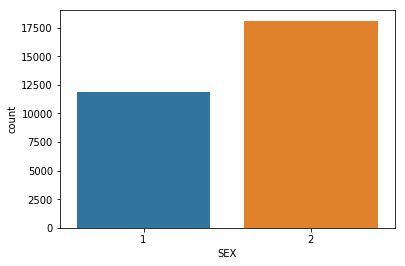

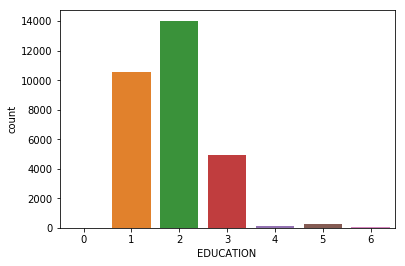

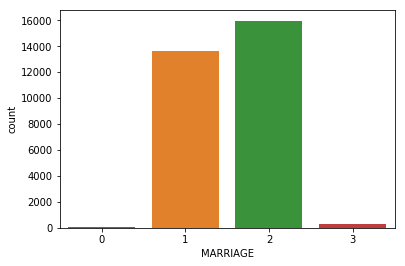

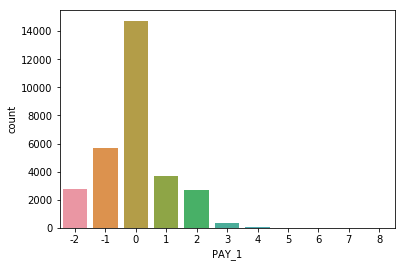

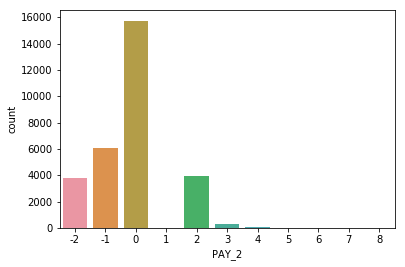

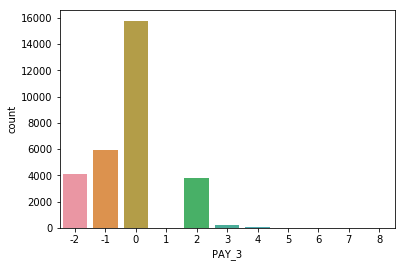

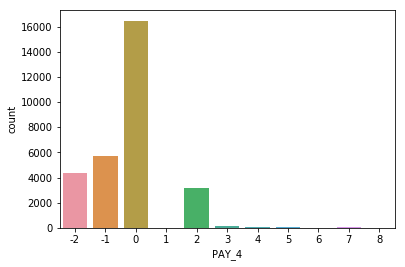

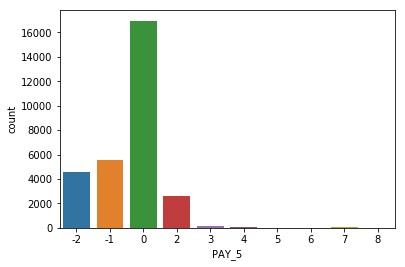

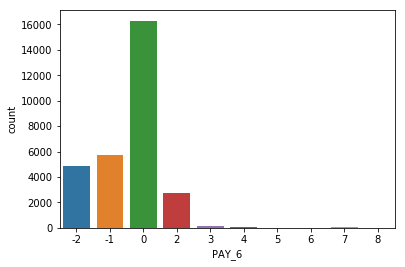

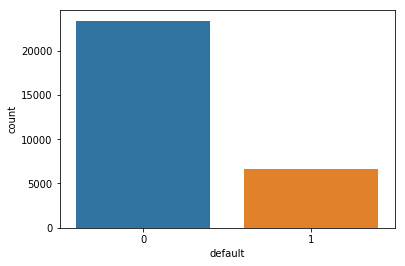

In [25]:
import seaborn as sns
for g in cat:
        sns.countplot(data[g])
        #plt.savefig(str(g)+'_barplot.png')
        
        plt.show()

In [26]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

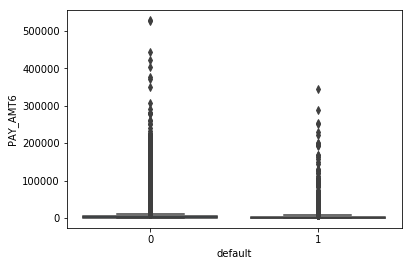

In [27]:
sns.boxplot(x='default',y= 'PAY_AMT6',data=data)

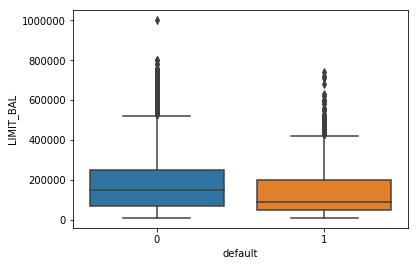

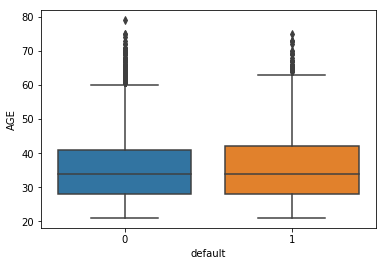

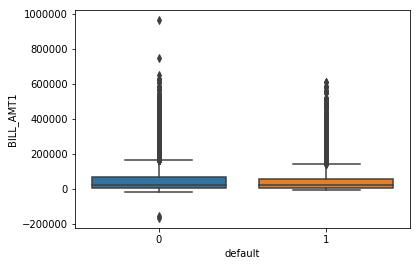

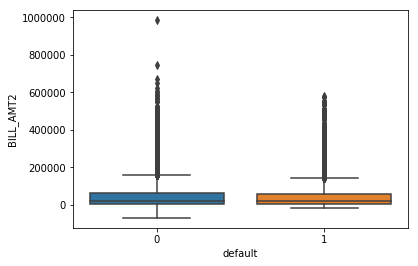

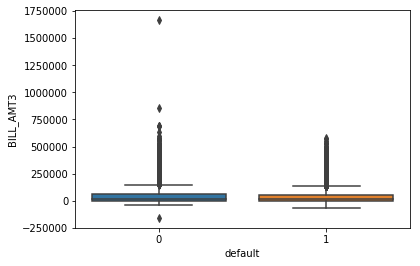

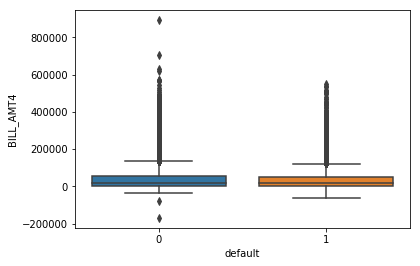

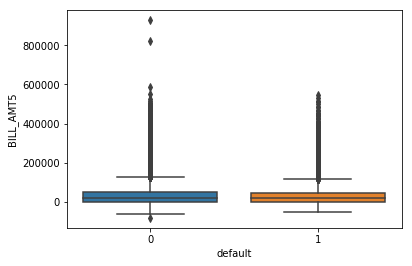

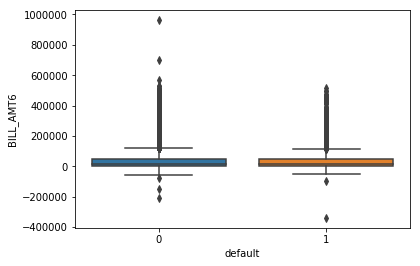

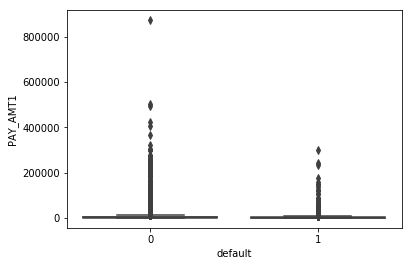

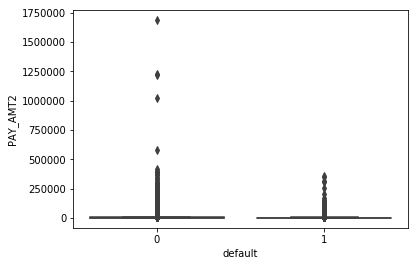

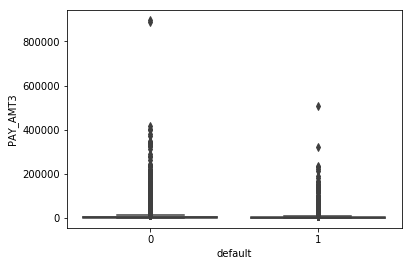

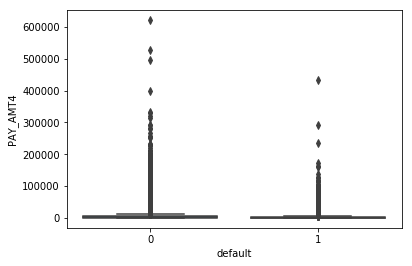

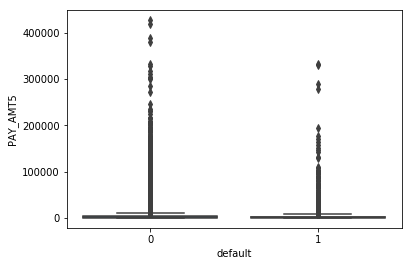

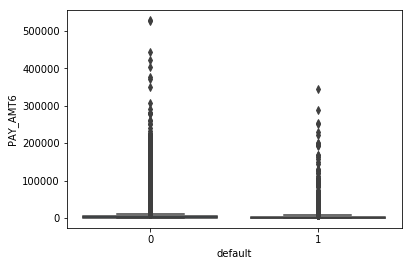

In [28]:
for i in num:
  sns.boxplot(x='default',y = i,data=data)
  plt.show()

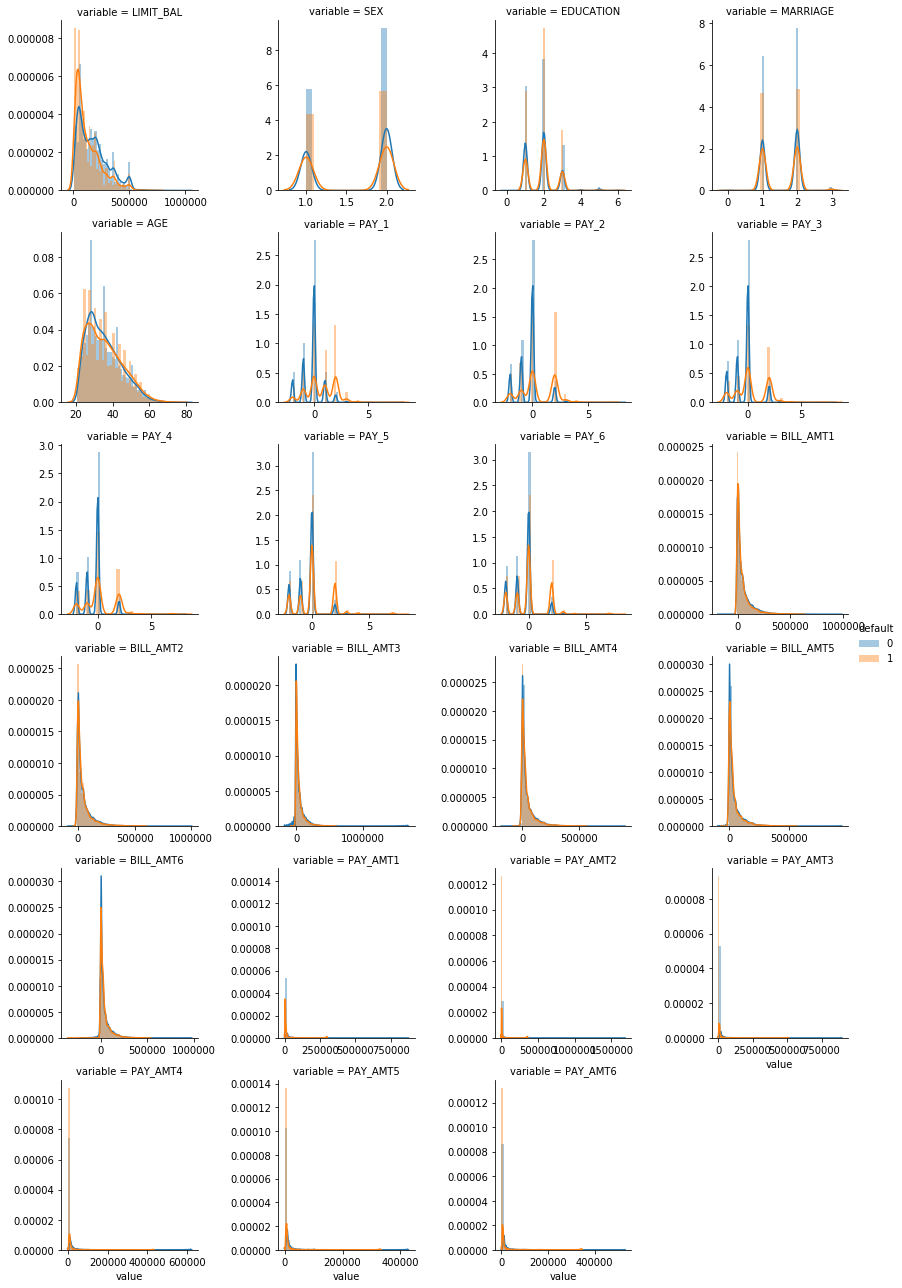

In [29]:
output = 'default'

# Let's do a little EDA
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
#cols.remove( "ID")
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=4, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [0]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

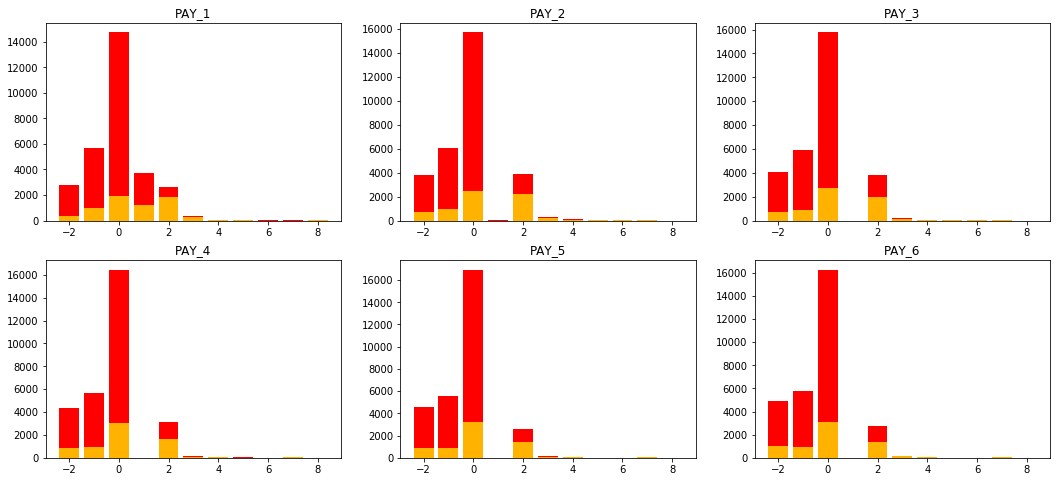

In [31]:
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['default']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

The above barplot shows for each month payment status the count of defaulters and non defaulters

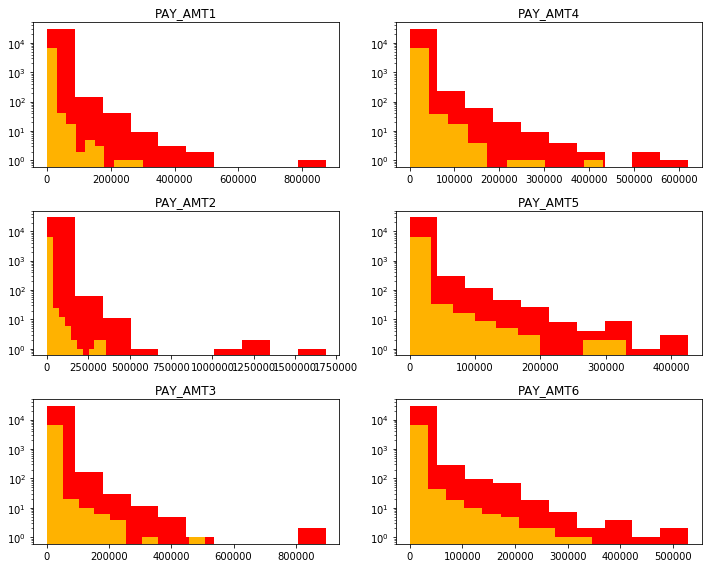

In [32]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[pay_amt_columns[i]], color ='red')
    ax[row,col].hist(data[pay_amt_columns[i]][(data['default']==1)],color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [0]:
df = data.copy()

In [0]:
df = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE'])

In [36]:
df.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,0,0,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,0,0,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,0,0,0,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
df.PAY_1=df.PAY_1 + 2


In [0]:
pay=['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for i in pay:
    df[i]=df[i]+2


## Information and weight of evidence.


In [0]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [0]:
max_bin = 30
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [41]:
final_iv, IV = data_vars(df,df.default)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log


In [42]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,LIMIT_BAL,10000,30000,4081,1463,0.358491,2618,0.641509,0.220464,0.112053,0.676765,1.753614e-01
1,LIMIT_BAL,40000,50000,3595,977,0.271766,2618,0.728234,0.147227,0.112053,0.273008,1.753614e-01
2,LIMIT_BAL,60000,80000,3123,806,0.258085,2317,0.741915,0.121459,0.099170,0.202742,1.753614e-01
3,LIMIT_BAL,90000,120000,3013,749,0.248589,2264,0.751411,0.112869,0.096901,0.152538,1.753614e-01
4,LIMIT_BAL,130000,160000,3282,651,0.198355,2631,0.801645,0.098101,0.112609,-0.137923,1.753614e-01
5,LIMIT_BAL,170000,200000,3284,573,0.174482,2711,0.825518,0.086347,0.116033,-0.295500,1.753614e-01
6,LIMIT_BAL,210000,260000,3426,567,0.165499,2859,0.834501,0.085443,0.122368,-0.359181,1.753614e-01
7,LIMIT_BAL,270000,360000,3720,556,0.149462,3164,0.850538,0.083785,0.135422,-0.480137,1.753614e-01
8,LIMIT_BAL,370000,1000000,2476,294,0.118740,2182,0.881260,0.044304,0.093392,-0.745730,1.753614e-01
9,SEX,1,1,11888,2873,0.241672,9015,0.758328,0.432942,0.385850,0.115154,9.179578e-03


In [43]:
IV.sort_values('IV')

,VAR_NAME,IV
7,EDUCATION_0,3.591632e-07
4,BILL_AMT4,5.661074e-05
3,BILL_AMT3,1.940948e-04
13,EDUCATION_6,2.690088e-04
5,BILL_AMT5,4.367304e-04
18,MARRIAGE_3,5.234028e-04
2,BILL_AMT2,8.651334e-04
15,MARRIAGE_0,1.377427e-03
0,AGE,1.528468e-03
6,BILL_AMT6,2.050740e-03


## **Outlier** analysis

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

Two functions that statistically identify outliers in pandas series using std and IQR.

In [0]:
def out_std(s, nstd=3.0, return_thresholds=False):
  data_mean, data_std = s.mean(), s.std()
  cut_off = data_std * nstd
  lower, upper = data_mean - cut_off, data_mean + cut_off
  if return_thresholds:
     return lower, upper
  else:
     return [True if x < lower or x > upper else False for x in s]

In [0]:
def out_iqr(s, k=1.5, return_thresholds=False):
  # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [47]:
outlier_mask = out_std(data['LIMIT_BAL'], nstd=3.0)
outlier_mask[:10]

[False, False, False, False, False, False, False, False, False, False]

In [48]:
data['LIMIT_BAL'][outlier_mask]

ID
13        630000
434       580000
452       600000
528       620000
556       630000
738       610000
812       700000
1096      670000
1232      680000
1348      630000
1905      580000
1993      580000
2198     1000000
2223      600000
2352      580000
3315      600000
3403      710000
3406      560000
3690      710000
3734      750000
4034      710000
4252      580000
4604      750000
4755      680000
4860      640000
5334      580000
5809      640000
5879      710000
6080      670000
6638      610000
          ...   
23894     620000
24224     580000
24321     780000
24409     620000
24554     600000
24684     590000
24687     730000
25127     740000
25487     600000
26033     650000
26113     720000
26137     600000
26177     670000
26228     610000
26873     560000
26922     720000
27098     580000
27460     700000
27558     730000
28562     640000
28716     780000
28823     590000
29012     580000
29137     610000
29405     610000
29572     570000
29741     620000
29862     6

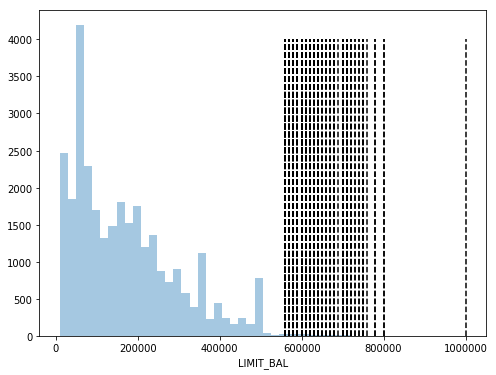

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(data['LIMIT_BAL'], kde=False);
plt.vlines(data['LIMIT_BAL'][outlier_mask], ymin=0, ymax=4000, linestyles='dashed')

## LR without sampling

In [0]:
X_unsamples=df.drop('default',axis=1)
y_unsamples=df.default

In [53]:
X_unsamples.shape

(30000, 32)

In [0]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_unsamples,y_unsamples,test_size=0.3,random_state=1234)

In [55]:
X_train1.shape,y_train1.shape

((21000, 32), (21000,))

In [0]:
lr=LogisticRegression()

In [0]:
lr_model1=lr.fit(X_train1,y_train1)

In [0]:
pred_1=lr_model1.predict(X_test1)

In [59]:
accuracy_score(y_test1,pred_1)

0.7763333333333333

In [60]:
confusion_matrix(y_test1, pred_1)

array([[6987,    0],
       [2013,    0]])

In [0]:
from sklearn.metrics import classification_report

In [62]:
# create classification report
print(classification_report(y_test1, pred_1, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.78      1.00      0.87      6987
     default       0.00      0.00      0.00      2013

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree with out sampling

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [0]:
DT=DecisionTreeClassifier()

In [0]:
DT1=DT.fit(X_train1,y_train1)

In [0]:
predydt1=DT1.predict(X_test1)

In [67]:
print(classification_report(y_test1,predydt1))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6987
           1       0.41      0.44      0.42      2013

    accuracy                           0.73      9000
   macro avg       0.62      0.63      0.62      9000
weighted avg       0.74      0.73      0.73      9000



## Random Forest  with out sampling




In [0]:
rf = RandomForestClassifier()

In [69]:
rf1=rf.fit(X_train1,y_train1)
predyrf1=rf1.predict(X_test1)
print(classification_report(y_test1,predyrf1))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6987
           1       0.61      0.34      0.43      2013

    accuracy                           0.80      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000



## LogisticRegression With balanced

In [0]:
lr_balanced=LogisticRegression(class_weight='balanced')

In [71]:
lr_model2=lr_balanced.fit(X_train1,y_train1)
pred_2=lr_model2.predict(X_test1)
print("Accuracy_score:",accuracy_score(y_test1,pred_2))
print("Confusion_matrix:\n",confusion_matrix(y_test1, pred_2))
print(classification_report(y_test1, pred_2, target_names=['not default', 'default']))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy_score: 0.6118888888888889
Confusion_matrix:
 [[4139 2848]
 [ 645 1368]]
              precision    recall  f1-score   support

 not default       0.87      0.59      0.70      6987
     default       0.32      0.68      0.44      2013

    accuracy                           0.61      9000
   macro avg       0.59      0.64      0.57      9000
weighted avg       0.74      0.61      0.64      9000



## Decision Tree With balanced

In [0]:
DT2=DecisionTreeClassifier(class_weight='balanced')

In [73]:
DT22=DT2.fit(X_train1,y_train1)
predydt2=DT1.predict(X_test1)
print(classification_report(y_test1,predydt2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6987
           1       0.41      0.44      0.42      2013

    accuracy                           0.73      9000
   macro avg       0.62      0.63      0.62      9000
weighted avg       0.74      0.73      0.73      9000



# Random Forest

In [74]:
rf1=rf.fit(X_train1,y_train1)
predyrf1=rf1.predict(X_test1)
print(classification_report(y_test1,predyrf1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6987
           1       0.62      0.34      0.44      2013

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.66      9000
weighted avg       0.78      0.81      0.78      9000



In [0]:
X=df.drop('default',axis=1)
y=df.default

# Using upsampling:

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=1234)

In [157]:
X_train.shape,X_test.shape

((21000, 32), (9000, 32))

In [197]:
y_train.value_counts()

0    16355
1     4645
Name: default, dtype: int64

In [0]:
# Separate majority and minority classes
y_majority = y_train[y_train==0]
y_minority = y_train[y_train==1]

In [0]:
from sklearn.utils import resample

In [0]:
# Upsample minority class
y_minority_upsampled = resample(y_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4645,    # to match majority class
                                 random_state=1234) # reproducible results

In [0]:
# Combine majority class with upsampled minority class
y_upsampled = pd.concat([y_majority, y_minority_upsampled])

In [205]:
y_upsampled.shape,X_train.shape

((21000,), (21000, 32))

## LogisticRegression upsampling

In [207]:
clf_2 = LogisticRegression().fit(X_train, y_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pred_y_2 = clf_2.predict(X_test)

In [211]:
accuracy_score(y_test, pred_y_2)

0.7787777777777778

In [212]:
confusion_matrix(y_test, pred_y_2)

array([[7009,    0],
       [1991,    0]])

In [213]:
print(classification_report(y_test, pred_y_2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree with upsampling

In [215]:
DTupsampled=DT2.fit(X_train, y_upsampled)
predydt3=DTupsampled.predict(X_test)
print(classification_report(y_test,predydt3))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      7009
           1       0.21      0.22      0.22      1991

    accuracy                           0.65      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.65      0.65      0.65      9000



## Random forest with upsampling

In [216]:
rf2=rf.fit(X_train, y_upsampled)
predyrf2=rf2.predict(X_test)
print(classification_report(y_test,predyrf2))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      7009
           1       0.24      0.03      0.05      1991

    accuracy                           0.76      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.66      0.76      0.69      9000



## Smote technique:

In [0]:
X=df.drop("default",axis=1)
y=df.default

In [91]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
def makeOverSamplesSMOTE(X,y):
    X = X_train
    y = y_train
    sm = SMOTE(random_state=1234)
    X, y = sm.fit_sample(X, y)
    return X,y

In [0]:
Xsmote,ysmote = makeOverSamplesSMOTE(X,y)

## LogisticRegression with Smote

In [0]:
lr3=LogisticRegression()

In [171]:
model3=lr3.fit(Xsmote,ysmote)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
pred_y3 = model3.predict(X_test)

In [173]:
print(classification_report(y_test,pred_y3))

              precision    recall  f1-score   support

           0       0.87      0.51      0.64      7009
           1       0.30      0.73      0.42      1991

    accuracy                           0.56      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.74      0.56      0.59      9000



## Decision Tree with Smote

In [174]:
DT_smote=DT2.fit(Xsmote,ysmote)
predydt4=DT_smote.predict(X_test)
print(classification_report(y_test,predydt4))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      7009
           1       0.36      0.44      0.40      1991

    accuracy                           0.71      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.71      0.71      9000



## Random Forest with Smote

In [175]:
rf_smote=rf.fit(Xsmote,ysmote)
predyrf3=rf_smote.predict(X_test)
print(classification_report(y_test,predyrf3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7009
           1       0.53      0.38      0.44      1991

    accuracy                           0.79      9000
   macro avg       0.68      0.64      0.66      9000
weighted avg       0.77      0.79      0.78      9000



## ADASYN 

In [0]:
from imblearn.over_sampling import ADASYN

In [0]:
def makeOverSamplesADASYN(X,y):
  
  X = X_train
  y = y_train
  sm = ADASYN(random_state=1234)
  X, y = sm.fit_sample(X, y)
  return X,y

In [159]:
X_train.shape,y_train.shape

((21000, 32), (21000,))

In [0]:
XADASYN,yADASYN = makeOverSamplesADASYN(X,y)

## LogisticRegression with ADASYN

In [165]:
logAdasyn = LogisticRegression().fit(XADASYN,yADASYN)
pred_y4 = logAdasyn.predict(X_test)
print(classification_report(y_test,pred_y4))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.49      0.63      7009
           1       0.29      0.74      0.42      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.61      0.52      9000
weighted avg       0.74      0.55      0.58      9000



## Decision Tree with ADASYN

In [166]:
DT_adasyn=DT2.fit(XADASYN,yADASYN)
predydt5=DT_adasyn.predict(X_test)
print(classification_report(y_test,predydt5))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7009
           1       0.36      0.41      0.38      1991

    accuracy                           0.70      9000
   macro avg       0.59      0.60      0.59      9000
weighted avg       0.72      0.70      0.71      9000



## Random Forest with ADASYN

In [167]:
rf_adasyn=rf.fit(XADASYN,yADASYN)
predydt4=rf_adasyn.predict(X_test)
print(classification_report(y_test,predydt4))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7009
           1       0.53      0.39      0.45      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.77      0.79      0.78      9000



## SMOTEENN,SMOTETomek

In [0]:
from imblearn.combine import SMOTEENN,SMOTETomek

In [0]:
def makeOverSamplesSmoteenn(X,y):
  
  X = X_train
  y = y_train
  sm = SMOTEENN(random_state=123)
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
XSmoteenn,ySmoteenn = makeOverSamplesSmoteenn(X,y)


## Logistic Regression with Smoteenn

In [179]:
logSmoteenn = LogisticRegression().fit(XSmoteenn,ySmoteenn)
pred_y5 = logSmoteenn.predict(X_test)
print(classification_report(y_test,pred_y5))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.35      0.50      7009
           1       0.27      0.85      0.41      1991

    accuracy                           0.46      9000
   macro avg       0.58      0.60      0.46      9000
weighted avg       0.76      0.46      0.48      9000



## Decision tree with Smoteenn

In [180]:
DT_logSmoteenn=DT2.fit(XSmoteenn,ySmoteenn)
predydt5=DT_logSmoteenn.predict(X_test)
print(classification_report(y_test,predydt5))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      7009
           1       0.35      0.60      0.44      1991

    accuracy                           0.66      9000
   macro avg       0.60      0.64      0.60      9000
weighted avg       0.74      0.66      0.69      9000



## Random Forest with Smoteenn

In [182]:
rf_logSmoteenn=rf.fit(XSmoteenn,ySmoteenn)
predyrf5=rf_logSmoteenn.predict(X_test)
print(classification_report(y_test,predyrf5))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7009
           1       0.43      0.58      0.49      1991

    accuracy                           0.74      9000
   macro avg       0.65      0.68      0.66      9000
weighted avg       0.77      0.74      0.75      9000



In [0]:
def makeOverSamplesSMOTETomek(X,y):
  
  X = X_train
  y = y_train
  sm = SMOTETomek(random_state=1234)
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
XSMOTETomek,ySMOTETomek = makeOverSamplesSMOTETomek(X,y)

In [185]:
logSMOTETomek = LogisticRegression().fit(XSMOTETomek,ySMOTETomek)
pred_y6 = logSMOTETomek.predict(X_test)
print(classification_report(y_test,pred_y6))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.50      0.64      7009
           1       0.29      0.73      0.42      1991

    accuracy                           0.55      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.74      0.55      0.59      9000



In [186]:
DT_logSMOTETomek=DT2.fit(XSMOTETomek,ySMOTETomek)
predydt6=DT_logSMOTETomek.predict(X_test)
print(classification_report(y_test,predydt6))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      7009
           1       0.37      0.43      0.40      1991

    accuracy                           0.71      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.71      0.72      9000



In [187]:
rf_logSMOTETomek=rf.fit(XSMOTETomek,ySMOTETomek)
predyrf6=rf_logSMOTETomek.predict(X_test)
print(classification_report(y_test,predyrf6))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7009
           1       0.52      0.38      0.44      1991

    accuracy                           0.79      9000
   macro avg       0.68      0.64      0.65      9000
weighted avg       0.77      0.79      0.77      9000



Lift gain charts

In [0]:
pip install scikit-plot

In [0]:
import scikitplot as skplt

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


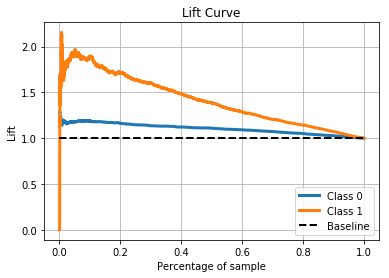

In [188]:
lr = LogisticRegression()
lr = lr.fit(XSMOTETomek,ySMOTETomek)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()